In [16]:
# Force reload the module (needed after changes to keyboard.py)
import importlib
import keyboard
importlib.reload(keyboard)

from keyboard import (
    # Rectangle-based keyboards
    generate_keyboard, generate_keyboard_height, generate_keyboard_2d,
    generate_uniform_keyboard, compare_keyboards, visualize_keyboard,
    # Grid-based keyboards (polygon shapes)
    generate_grid_keyboard, generate_grid_keyboard_from_2d,
    visualize_grid_keyboard, compare_grid_keyboards, print_grid_stats,
    # Unit grid system (1mm x 1mm cells)
    generate_unit_grid_keyboard, generate_unit_grid_log2d,
    fill_space, align_keys_vertically,
    visualize_unit_grid, compare_unit_grids, print_unit_grid_stats,
    UnitGridKeyboard,
    # Data
    FREQUENCIES, ROWS, BASE_WIDTH, BASE_HEIGHT, Key, GridKey
)

%matplotlib inline

## Round 1: Width-Only Scaling

c:\Users\scmcm\freq-key\freq-key\keyboard.py:2471: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\scmcm\freq-key\freq-key\keyboard.py:2471: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\scmcm\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\scmcm\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


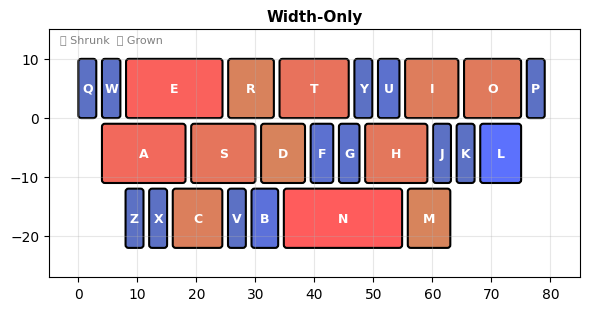

In [17]:
linear_w = generate_keyboard(scale_method='linear')
compare_keyboards([
    ('Width-Only', linear_w)
])

## Round 2: Height-Only Scaling

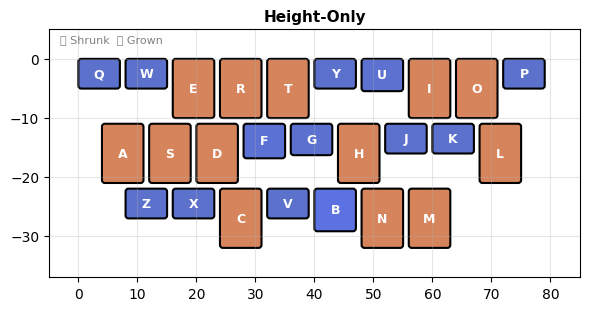

In [18]:
linear_h = generate_keyboard_height(scale_method='linear')
compare_keyboards([
    ('Height-Only', linear_h)
])

## Round 3: Width + Height Scaling

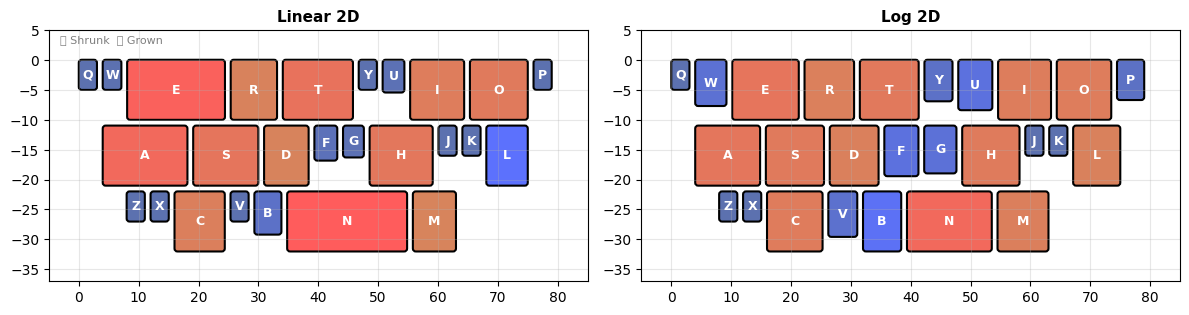

In [19]:
linear_2d = generate_keyboard_2d(scale_method='linear')
log_2d = generate_keyboard_2d(scale_method='log')
compare_keyboards([
    ('Linear 2D', linear_2d),
    ('Log 2D', log_2d)
])

## Round 4: Log 2D + Vertical Alignment + Fill Space

Starting from Round 3's Log 2D sizing:
1. **Log 2D Grid**: Keys sized by frequency (from Round 3)
2. **Vertical Alignment**: Row 0 = top, Row 1 = middle, Row 2 = bottom
3. **Fill Space**: Redistribute remaining units to high-freq neighbors

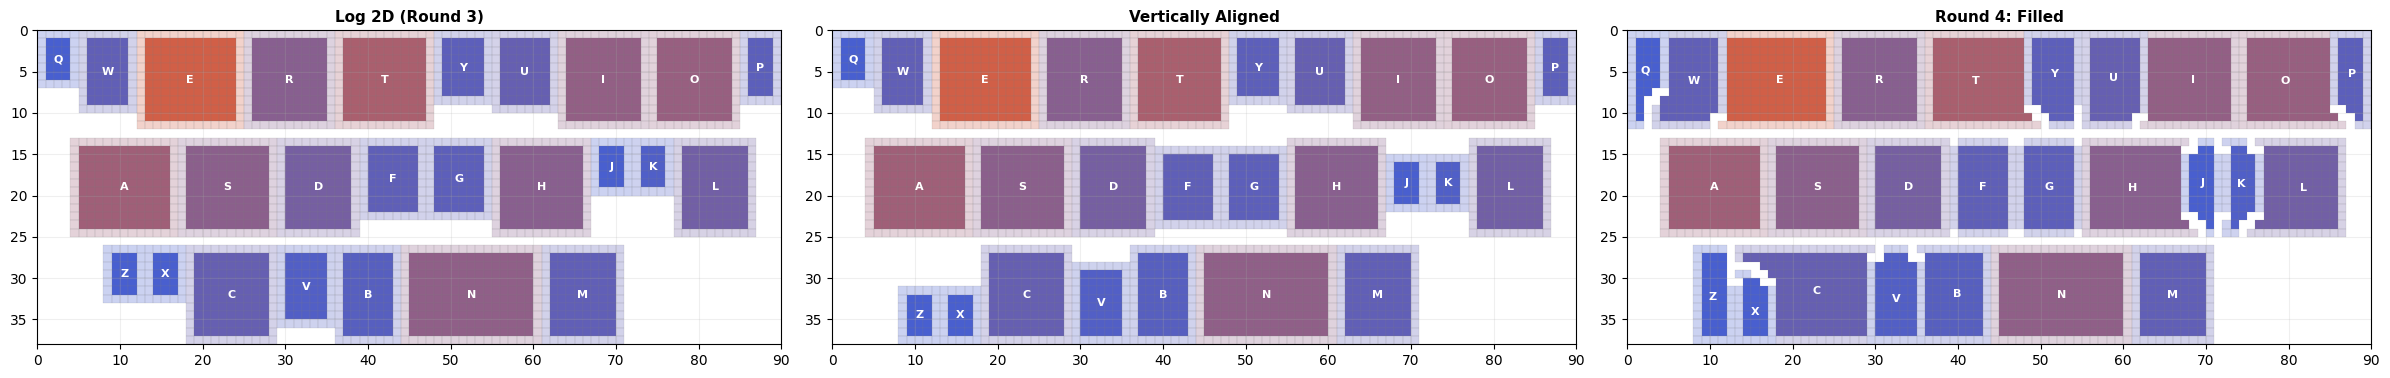


Log 2D (starting point):
--------------------------------------------------
  Grid size: 90 × 38 = 3420 units
  Total assigned: 2595 units (uniform: 2808)

  Top 5 largest keys:
    N: 204 units (1.89x uniform), active: 15×10
    E: 156 units (1.44x uniform), active: 11×10
    A: 156 units (1.44x uniform), active: 11×10
    T: 144 units (1.33x uniform), active: 10×10
    S: 144 units (1.33x uniform), active: 10×10

  Top 5 smallest keys:
    Q: 35 units (0.32x uniform), active: 3×5
    J: 35 units (0.32x uniform), active: 3×5
    K: 35 units (0.32x uniform), active: 3×5
    Z: 35 units (0.32x uniform), active: 3×5
    X: 35 units (0.32x uniform), active: 3×5

Round 4 (after fill_space):
--------------------------------------------------
  Grid size: 90 × 38 = 3420 units
  Total assigned: 2756 units (uniform: 2808)

  Top 5 largest keys:
    N: 204 units (1.89x uniform), active: 15×10
    E: 157 units (1.45x uniform), active: 12×10
    A: 156 units (1.44x uniform), active: 11×10
    H:

In [20]:
# Start with Log 2D sizing (Round 3 output)
log2d_grid = generate_unit_grid_log2d(scale_method='log')

# Apply vertical alignment
aligned_grid = align_keys_vertically(log2d_grid)

# Fill remaining space
filled_grid = fill_space(aligned_grid, scale_method='log')

# Compare: Log2D -> Aligned -> Filled
compare_unit_grids([
    ("Log 2D (Round 3)", log2d_grid),
    ("Vertically Aligned", aligned_grid),
    ("Round 4: Filled", filled_grid)
])

print_unit_grid_stats(log2d_grid, "Log 2D (starting point)")
print_unit_grid_stats(filled_grid, "Round 4 (after fill_space)")

## Round 5: Topology Preservation

Same as Round 4, but with topology preservation: **no new adjacencies allowed during expansion**.

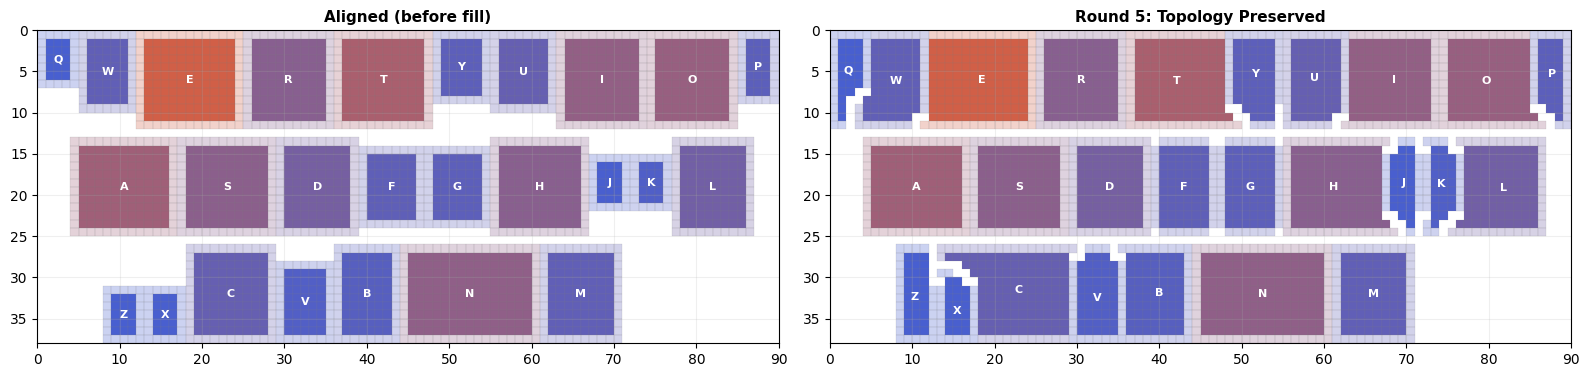


Round 5 Result:
--------------------------------------------------
  Grid size: 90 × 38 = 3420 units
  Total assigned: 2756 units (uniform: 2808)

  Top 5 largest keys:
    N: 204 units (1.89x uniform), active: 15×10
    E: 157 units (1.45x uniform), active: 12×10
    A: 156 units (1.44x uniform), active: 11×10
    H: 148 units (1.37x uniform), active: 12×10
    T: 147 units (1.36x uniform), active: 12×10

  Top 5 smallest keys:
    P: 52 units (0.48x uniform), active: 3×10
    Q: 46 units (0.43x uniform), active: 3×10
    K: 46 units (0.43x uniform), active: 3×10
    J: 43 units (0.40x uniform), active: 3×10
    X: 39 units (0.36x uniform), active: 3×7


In [21]:
# Round 5: Same as Round 4 but with topology preservation
log2d_grid = generate_unit_grid_log2d(scale_method='log')
aligned_grid = align_keys_vertically(log2d_grid)
filled_grid = fill_space(aligned_grid, scale_method='log')

compare_unit_grids([
    ("Aligned (before fill)", aligned_grid),
    ("Round 5: Topology Preserved", filled_grid)
])

print_unit_grid_stats(filled_grid, "Round 5 Result")

## Statistics

In [22]:
# Compare dimensions across rounds